# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#from scipy.stats import linregress as st
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url="http://api.openweathermap.org/data/2.5/weather?"
units="metric"
Cities=[]
temp=[]
lat=[]
lng=[]
cloudiness=[]
wind_speed=[]
max_temp=[]
humidity=[]
country=[]
date=[]
for index,city in enumerate(cities):
   query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"   
   #print(query_url)
    
   try:
       weather_data = requests.get(query_url).json()
       lat.append(weather_data["coord"]["lat"])
       lng.append(weather_data["coord"]["lon"])
       temp.append(weather_data["main"]["temp"])
       cloudiness.append(weather_data["clouds"]["all"])
       wind_speed.append(weather_data["wind"]["speed"])
       max_temp.append(weather_data["main"]["temp_max"])
       humidity.append(weather_data["main"]["humidity"])
       country.append(weather_data["sys"]["country"])
       date.append(weather_data["dt"])
       Cities.append(weather_data["name"])
       
       temperature=weather_data["main"]["temp"]
       print(f"Processing Record {index}|{city}")
   except:
        print("City not found. Skipping...")
        pass

Processing Record 0|albany
Processing Record 1|dargaville
Processing Record 2|bukachacha
Processing Record 3|vila do maio
Processing Record 4|ondjiva
Processing Record 5|chokurdakh
City not found. Skipping...
Processing Record 7|vaini
Processing Record 8|ardakan
Processing Record 9|rikitea
Processing Record 10|hithadhoo
City not found. Skipping...
Processing Record 12|jamame
Processing Record 13|kapaa
Processing Record 14|mount isa
Processing Record 15|kismayo
Processing Record 16|kodiak
City not found. Skipping...
Processing Record 18|ushuaia
Processing Record 19|east london
Processing Record 20|evensk
Processing Record 21|longyearbyen
Processing Record 22|santa cruz
Processing Record 23|beloha
Processing Record 24|pimentel
Processing Record 25|road town
Processing Record 26|cherskiy
Processing Record 27|new norfolk
Processing Record 28|cabo san lucas
Processing Record 29|cape town
Processing Record 30|bluff
Processing Record 31|chipata
Processing Record 32|butaritari
Processing Recor

Processing Record 270|coolum beach
Processing Record 271|hasaki
Processing Record 272|rocha
Processing Record 273|the pas
Processing Record 274|sao gabriel
Processing Record 275|kaeo
Processing Record 276|ahar
Processing Record 277|azul
Processing Record 278|waynesboro
Processing Record 279|batagay-alyta
Processing Record 280|constantine
Processing Record 281|beeville
Processing Record 282|panzhihua
Processing Record 283|margate
Processing Record 284|bonfim
Processing Record 285|guerrero negro
Processing Record 286|sept-iles
Processing Record 287|vostok
Processing Record 288|rundu
Processing Record 289|kefamenanu
Processing Record 290|aljezur
City not found. Skipping...
Processing Record 292|berlevag
Processing Record 293|salinas
Processing Record 294|emerald
Processing Record 295|chifeng
Processing Record 296|tres arroyos
Processing Record 297|tessalit
Processing Record 298|hami
Processing Record 299|mount gambier
Processing Record 300|chateaubelair
Processing Record 301|goma
Processi

Processing Record 534|rock sound
Processing Record 535|pundaguitan
Processing Record 536|srednebelaya
Processing Record 537|bone
Processing Record 538|tricase
Processing Record 539|obo
Processing Record 540|sola
Processing Record 541|lanquin
Processing Record 542|zhezkazgan
Processing Record 543|flinders
Processing Record 544|ust-karsk
Processing Record 545|gornopravdinsk
Processing Record 546|grindavik
Processing Record 547|turukhansk
Processing Record 548|sicuani
Processing Record 549|stephenville
Processing Record 550|kieta
Processing Record 551|baryatino
Processing Record 552|willmar
Processing Record 553|broome
Processing Record 554|birganj
Processing Record 555|okhotsk
Processing Record 556|hobyo
Processing Record 557|chumikan
Processing Record 558|antalaha
Processing Record 559|puerto narino
Processing Record 560|boke
Processing Record 561|bosaso
Processing Record 562|tooele
Processing Record 563|fukue
Processing Record 564|singaparna
Processing Record 565|buchanan
Processing Re

In [5]:
len(Cities)

573

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": Cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":date
}

weather_data_df=pd.DataFrame(weather_dict)
weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,20.56,75,34,2.45,US,1596447946
1,Dargaville,-35.93,173.88,10.59,93,41,2.26,NZ,1596448204
2,Bukachacha,52.98,116.92,16.25,78,100,4.57,RU,1596448205
3,Vila do Maio,15.13,-23.22,28.00,69,20,3.10,CV,1596448205
4,Ondjiva,-17.07,15.73,22.00,17,0,4.10,AO,1596448205


In [49]:
weather_data_df.to_csv("output_data/cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
humidity_df=weather_data_df.loc[weather_data_df["Humidity"]>100]
humidity_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [11]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

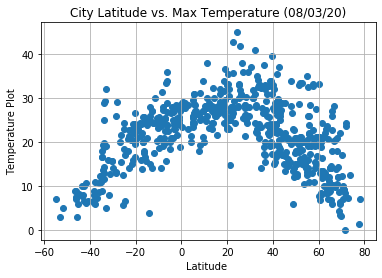

In [12]:
plt.scatter(weather_data_df["Lat"],weather_data_df["Max Temp"])
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude ")
plt.ylabel("Temperature Plot")
plt.grid()
plt.savefig("output_data/one.png")
plt.show()

## Latitude vs. Humidity Plot

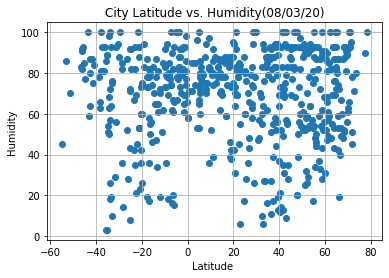

In [47]:
plt.scatter(weather_data_df["Lat"],weather_data_df["Humidity"])
plt.title("City Latitude vs. Humidity(%s)" % time.strftime("%x"))
plt.xlabel("Latitude ")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("output_data/two.png")
plt.show()


## Latitude vs. Cloudiness Plot

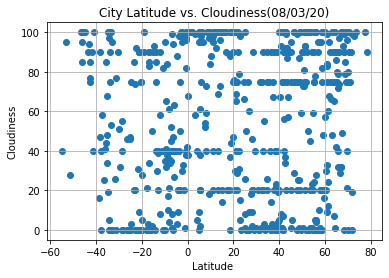

In [46]:
plt.scatter(weather_data_df["Lat"],weather_data_df["Cloudiness"])
plt.title("City Latitude vs. Cloudiness(%s)" % time.strftime("%x"))
plt.xlabel("Latitude ")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("output_data/three.png")
plt.show()

## Latitude vs. Wind Speed Plot

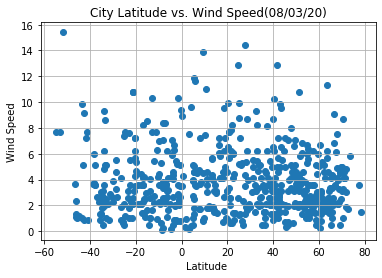

In [48]:
plt.scatter(weather_data_df["Lat"],weather_data_df["Wind Speed"])
plt.title("City Latitude vs. Wind Speed(%s)" % time.strftime("%x"))
plt.xlabel("Latitude ")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig("output_data/four.png")
plt.show()

## Linear Regression

In [25]:
# OPTIONAL: Create a function to create Linear Regression plots
def linearplot(x_axis,y_axis,y_label,coord):

        (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
        regress_values = x_axis * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.scatter(x_axis,y_axis)
        plt.plot(x_axis,regress_values,"r-")
        plt.annotate(line_eq,coord,fontsize=15,color="red")

        plt.xlabel('Latitude')
        plt.ylabel(y_label)
        print(rvalue)
        
        plt.show()

In [26]:
# Create Northern and Southern Hemisphere DataFrames
n_df=weather_data_df.loc[weather_data_df["Lat"]>=0]
s_df=weather_data_df.loc[weather_data_df["Lat"]<0]
n_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,20.56,75,34,2.45,US,1596447946
2,Bukachacha,52.98,116.92,16.25,78,100,4.57,RU,1596448205
3,Vila do Maio,15.13,-23.22,28.00,69,20,3.10,CV,1596448205
5,Chokurdakh,70.63,147.92,10.08,66,100,3.25,RU,1596448205
7,Ardakān,32.31,54.02,41.00,10,20,3.10,IR,1596448205
...,...,...,...,...,...,...,...,...,...
567,Novoomskiy,54.84,73.30,35.00,17,0,6.00,RU,1596448320
568,Dingzhou,38.51,115.00,34.00,52,22,2.00,CN,1596448320
569,Araouane,18.90,-3.53,36.71,38,100,7.24,ML,1596448320
571,Thurso,58.59,-3.53,14.00,62,20,5.10,GB,1596448320


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

-0.6210772666572417


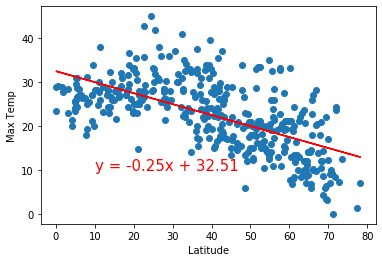

In [27]:
x_axis=n_df["Lat"]
y_axis=n_df["Max Temp"]
y_label="Max Temp"
coord=(10,10)
linearplot(x_axis,y_axis,y_label,coord)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

0.7427573682947797


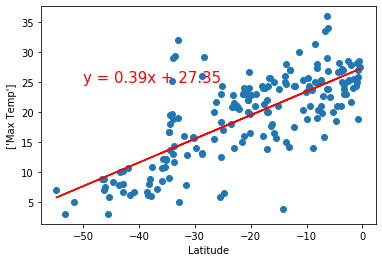

In [28]:
x_axis=s_df["Lat"]
y_axis=s_df["Max Temp"]
y_label=["Max Temp"]
coord=(-50,25)
linearplot(x_axis,y_axis,y_label,coord)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

-0.01584888533448779


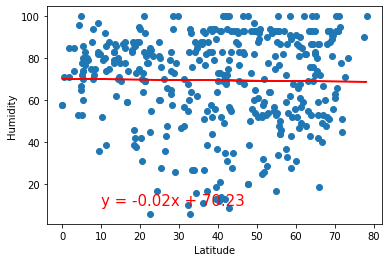

In [32]:
x_axis=n_df["Lat"]
y_axis=n_df["Humidity"]
y_label="Humidity"
coord=(10,10)
linearplot(x_axis,y_axis,y_label,coord)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.04553467538811639


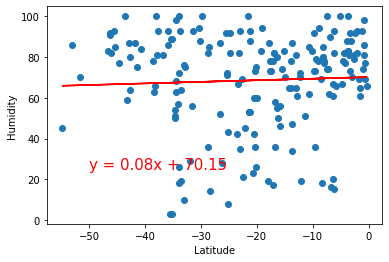

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.026289118240464482


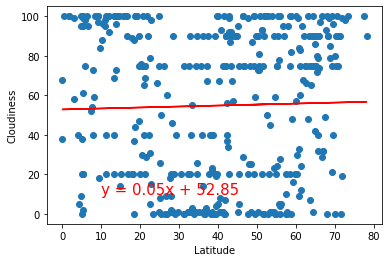

In [35]:
x_axis=n_df["Lat"]
y_axis=n_df["Cloudiness"]
y_label="Cloudiness"
coord=(10,10)
linearplot(x_axis,y_axis,y_label,coord)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

-0.09864634033259541


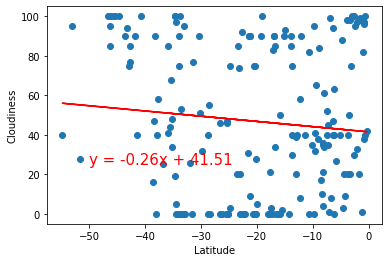

In [36]:
x_axis=s_df["Lat"]
y_axis=s_df["Cloudiness"]
y_label="Cloudiness"
coord=(-50,25)
linearplot(x_axis,y_axis,y_label,coord)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

-0.12684309322236775


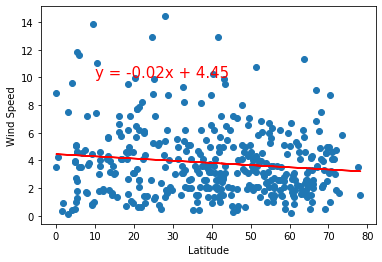

In [37]:
x_axis=n_df["Lat"]
y_axis=n_df["Wind Speed"]
y_label="Wind Speed"
coord=(10,10)
linearplot(x_axis,y_axis,y_label,coord)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

-0.05067342510793929


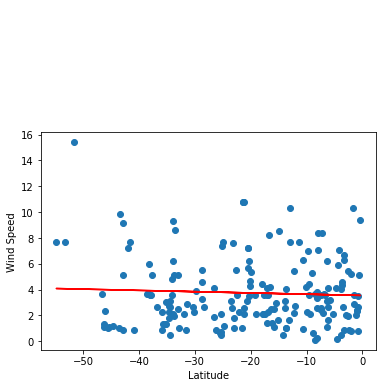

In [38]:
x_axis=s_df["Lat"]
y_axis=s_df["Wind Speed"]
y_label="Wind Speed"
coord=(-50,25)
linearplot(x_axis,y_axis,y_label,coord)